In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import poisson
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import random

# 1. DATA Î∂àÎü¨Ïò§Í∏∞

In [2]:
doosan_df1 = pd.read_csv('ÎëêÏÇ∞ ÌÉÄÏûê Ï¢ÖÌï© data.csv', encoding="cp949")
kt_df1 = pd.read_csv('KT ÌÉÄÏûê Ï¢ÖÌï© data.csv', encoding="cp949")

doosan_df2 = pd.read_csv('ÎëêÏÇ∞ ÌÉÄÏûê ÏïÑÏõÉÏπ¥Ïö¥Ìä∏Î≥Ñ data.csv', encoding="cp949")
kt_df2 = pd.read_csv('KT ÌÉÄÏûê ÏïÑÏõÉÏπ¥Ïö¥Ìä∏Î≥Ñ data.csv', encoding="cp949")

doosan_df3 = pd.read_csv('ÎëêÏÇ∞ ÌÉÄÏûê Ï£ºÏûê ÏúÑÏπòÎ≥Ñ data.csv', encoding="cp949")
kt_df3 = pd.read_csv('KT ÌÉÄÏûê Ï£ºÏûê ÏúÑÏπòÎ≥Ñ data.csv', encoding="cp949")

doosan_df4 = pd.read_csv('ÎëêÏÇ∞ ÌÉÄÏûê Ïπ¥Ïö¥Ìä∏Î≥Ñ data.csv', encoding="cp949")
kt_df4 = pd.read_csv('KT ÌÉÄÏûê Ïπ¥Ïö¥Ìä∏Î≥Ñ data.csv', encoding="cp949")

doosan_df5 = pd.read_csv('ÎëêÏÇ∞ Ìà¨Ïàò ÏÉÅÎåÄÏ†ÑÏ†Å data.csv', encoding="cp949")
kt_df5 = pd.read_csv('KT Ìà¨Ïàò ÏÉÅÎåÄÏ†ÑÏ†Å data.csv', encoding="cp949")

In [3]:
doosan_df1

ÌÉÄÏûê Ï†ïÎ≥¥     ÌÉÄÏú®  ÏïàÌÉÄ  2Î£®ÌÉÄ  3Î£®ÌÉÄ  ÌôàÎü∞  ÌÉÄÏ†ê  ÎìùÏ†ê  Ìù¨ÏÉùÎ≤àÌä∏  Ìù¨ÏÉùÌîåÎùºÏù¥  Î≥ºÎÑ∑  ÏÇºÏßÑ    Ïû•ÌÉÄÏú®    Ï∂úÎ£®Ïú®  \
0    Ï†ïÏàòÎπà  0.271  42    5    0   2  14  28     2      2  23  15  0.342  0.375   
1    ÏºÄÏù¥Î∏å  0.319  45    7    1   3  22  22     0      3  10  31  0.447  0.361   
2    ÏñëÏùòÏßÄ  0.329  47    9    0   5  29  20     0      2  21  21  0.497  0.417   
3    ÍπÄÏû¨Ìôò  0.255  35    4    1   5  24  19     0      0  17  34  0.409  0.346   
4    ÏñëÏÑùÌôò  0.277  44   10    0   5  22  21     0      3  13  45  0.434  0.341   
5    Í∞ïÏäπÌò∏  0.224  35   10    2   3  16  23     0      1  14  52  0.372  0.303   
6    Ïò§Î™ÖÏßÑ  0.253  23    5    2   1  16  13     0      0   9  20  0.385  0.327   
7    ÍπÄÏù∏ÌÉú  0.283  17    4    0   1   8   6     0      0  13  14  0.400  0.411   
8    Î∞ïÏ§ÄÏòÅ  0.227  25    8    0   1  10   9     1      1  10  32  0.327  0.306   
9    ÍπÄÍ∏∞Ïó∞  0.305  18    3    0   1  11   7     2      1   6  14  0.407  0.364   
10   ÏûÑÏ¢ÖÏÑ±  0.227   5    1    0   0   2   1     0      0   0   4  0.273  0.227   

      OPS  
0   0.717  
1   0.808  
2   0.914  
3   0.755  
4   0.775  
5   0.675  
6   0.712  
7   0.811  
8   0.633  
9   0.771  
10  0.500

In [4]:
kt_df1

ÌÉÄÏûê Ï†ïÎ≥¥     ÌÉÄÏú®  ÏïàÌÉÄ  2Î£®ÌÉÄ  3Î£®ÌÉÄ  ÌôàÎü∞  ÌÉÄÏ†ê  ÎìùÏ†ê  Ìù¨ÏÉùÎ≤àÌä∏  Ìù¨ÏÉùÌîåÎùºÏù¥  Î≥ºÎÑ∑  ÏÇºÏßÑ    Ïû•ÌÉÄÏú®    Ï∂úÎ£®Ïú®  \
0    Î°úÌïòÏä§  0.237  37    8    0   6  18  25     0      2  32  40  0.404  0.366   
1    Í∞ïÎ∞±Ìò∏  0.227  29    6    0   6  16  12     0      0  12  26  0.414  0.298   
2    ÌóàÍ≤ΩÎØº  0.301  31    2    0   1   8   9     0      1  11  12  0.350  0.371   
3    ÏïàÌòÑÎØº  0.370  20    4    1   6  17  10     0      0   4  10  0.815  0.433   
4    Ïû•ÏÑ±Ïö∞  0.208  27    4    0   4  19  12     1      4  21  34  0.331  0.310   
5    ÍπÄÎØºÌòÅ  0.329  54    6    1   0  11  21     0      1   6  14  0.378  0.358   
6    Ìô©Ïû¨Í∑†  0.256  34    5    0   1  13  13     0      1  14  30  0.316  0.329   
7    Î∞∞Ï†ïÎåÄ  0.184  21    5    2   1  12   6     4      2   5  33  0.289  0.234   
8    ÍπÄÏÉÅÏàò  0.206  12    3    0   1   3   7     0      0  14   6  0.302  0.351   
9    Î¨∏ÏÉÅÏ≤†  0.227  22    3    1   1   5   7     0      1  10  24  0.309  0.303   
10   Í∂åÎèôÏßÑ  0.317  26    3    1   0   7  10     2      1  11  26  0.378  0.394   

      OPS  
0   0.770  
1   0.712  
2   0.721  
3   1.248  
4   0.641  
5   0.736  
6   0.645  
7   0.523  
8   0.653  
9   0.602  
10  0.772

In [5]:
doosan_df2

ÏïÑÏõÉÏπ¥Ïö¥Ìä∏Ïóê Îî∞Î•∏ ÌÉÄÏú®  0 OUT  1 OUT  2 OUT
0           Ï†ïÏàòÎπà  0.297  0.222  0.267
1           ÏºÄÏù¥Î∏å  0.302  0.388  0.256
2           ÏñëÏùòÏßÄ  0.341  0.255  0.392
3           ÍπÄÏû¨Ìôò  0.250  0.156  0.354
4           ÏñëÏÑùÌôò  0.311  0.273  0.254
5           Í∞ïÏäπÌò∏  0.232  0.283  0.149
6           Ïò§Î™ÖÏßÑ  0.226  0.400  0.133
7           ÍπÄÏù∏ÌÉú  0.222  0.238  0.381
8           Î∞ïÏ§ÄÏòÅ  0.360  0.233  0.143
9           ÍπÄÍ∏∞Ïó∞  0.238  0.286  0.412
10          ÏûÑÏ¢ÖÏÑ±  0.167  0.333  0.200

In [6]:
kt_df2

ÏïÑÏõÉÏπ¥Ïö¥Ìä∏Ïóê Îî∞Î•∏ ÌÉÄÏú®  0 OUT  1 OUT  2 OUT
0           Î°úÌïòÏä§  0.221  0.255  0.243
1           Í∞ïÎ∞±Ìò∏  0.268  0.195  0.217
2           ÌóàÍ≤ΩÎØº  0.259  0.268  0.371
3           ÏïàÌòÑÎØº  0.350  0.313  0.444
4           Ïû•ÏÑ±Ïö∞  0.143  0.250  0.245
5           ÍπÄÎØºÌòÅ  0.288  0.345  0.360
6           Ìô©Ïû¨Í∑†  0.227  0.304  0.212
7           Î∞∞Ï†ïÎåÄ  0.118  0.171  0.256
8           ÍπÄÏÉÅÏàò  0.217  0.333  0.120
9           Î¨∏ÏÉÅÏ≤†  0.200  0.294  0.184
10          Í∂åÎèôÏßÑ  0.519  0.194  0.250

## NaN Í∞íÏùÑ ÌÉÄÏûêÏùò 1Î£®~ÎßåÎ£® ÌÉÄÏú® Í∞íÏùò ÌèâÍ∑†ÏúºÎ°ú ÎÑ£Ïñ¥Ï£ºÍ∏∞

In [7]:
doosan_df3

Ï£ºÏûê ÏúÑÏπòÏóê Îî∞Î•∏ ÌÉÄÏú®     1Î£®     2Î£®     3Î£®  1Î£®,2Î£®  1Î£®,3Î£®  2Î£®,3Î£®     ÎßåÎ£®
0           Ï†ïÏàòÎπà  0.393  0.364  0.167  0.167  0.000  0.500  0.000
1           ÏºÄÏù¥Î∏å  0.290  0.429  0.000  0.286  0.500  1.000  0.000
2           ÏñëÏùòÏßÄ  0.393  0.389  0.500  0.385  0.500  0.500  0.000
3           ÍπÄÏû¨Ìôò  0.324  0.500  0.000  0.385  0.500  0.000  0.000
4           ÏñëÏÑùÌôò  0.206  0.313  0.000  0.000  0.400  0.600  0.250
5           Í∞ïÏäπÌò∏  0.235  0.000  0.429  0.286  0.250  0.000  0.200
6           Ïò§Î™ÖÏßÑ  0.200  0.400  0.333  0.000  0.333  0.000  0.667
7           ÍπÄÏù∏ÌÉú  0.250  0.500  0.500  0.200  0.000  0.333  0.500
8           Î∞ïÏ§ÄÏòÅ  0.174  0.200  0.000  0.333  0.000  0.333  0.000
9           ÍπÄÍ∏∞Ïó∞  0.583  0.000  0.000  0.400    NaN  0.333  1.000
10          ÏûÑÏ¢ÖÏÑ±  0.500  0.333    NaN  0.500  0.000  0.000    NaN

In [8]:
cols_to_fill = ["1Î£®", "2Î£®", "3Î£®", "1Î£®,2Î£®", "1Î£®,3Î£®", "2Î£®,3Î£®", "ÎßåÎ£®"]
doosan_df3[cols_to_fill] = doosan_df3[cols_to_fill].apply(lambda row: row.fillna(row.mean()), axis=1)
doosan_df3

Ï£ºÏûê ÏúÑÏπòÏóê Îî∞Î•∏ ÌÉÄÏú®     1Î£®     2Î£®      3Î£®  1Î£®,2Î£®  1Î£®,3Î£®  2Î£®,3Î£®      ÎßåÎ£®
0           Ï†ïÏàòÎπà  0.393  0.364  0.1670  0.167  0.000  0.500  0.0000
1           ÏºÄÏù¥Î∏å  0.290  0.429  0.0000  0.286  0.500  1.000  0.0000
2           ÏñëÏùòÏßÄ  0.393  0.389  0.5000  0.385  0.500  0.500  0.0000
3           ÍπÄÏû¨Ìôò  0.324  0.500  0.0000  0.385  0.500  0.000  0.0000
4           ÏñëÏÑùÌôò  0.206  0.313  0.0000  0.000  0.400  0.600  0.2500
5           Í∞ïÏäπÌò∏  0.235  0.000  0.4290  0.286  0.250  0.000  0.2000
6           Ïò§Î™ÖÏßÑ  0.200  0.400  0.3330  0.000  0.333  0.000  0.6670
7           ÍπÄÏù∏ÌÉú  0.250  0.500  0.5000  0.200  0.000  0.333  0.5000
8           Î∞ïÏ§ÄÏòÅ  0.174  0.200  0.0000  0.333  0.000  0.333  0.0000
9           ÍπÄÍ∏∞Ïó∞  0.583  0.000  0.0000  0.400  0.386  0.333  1.0000
10          ÏûÑÏ¢ÖÏÑ±  0.500  0.333  0.2666  0.500  0.000  0.000  0.2666

In [9]:
kt_df3

Ï£ºÏûê ÏúÑÏπòÏóê Îî∞Î•∏ ÌÉÄÏú®     1Î£®     2Î£®     3Î£®  1Î£®,2Î£®  1Î£®,3Î£®  2Î£®,3Î£®     ÎßåÎ£®
0           Î°úÌïòÏä§  0.200  0.333  0.200  0.143   0.00  0.000  1.000
1           Í∞ïÎ∞±Ìò∏  0.237  0.300  0.400  0.100   0.25  0.000  0.000
2           ÌóàÍ≤ΩÎØº  0.333  0.000  0.400  0.125   0.50  0.250    NaN
3           ÏïàÌòÑÎØº  0.455  0.333  0.667  0.500   0.00  0.000  0.500
4           Ïû•ÏÑ±Ïö∞  0.250  0.333  0.000  0.100   0.25  0.000  0.400
5           ÍπÄÎØºÌòÅ  0.267  0.143  0.333  0.364   0.40  0.000  0.333
6           Ìô©Ïû¨Í∑†  0.323  0.000  0.667  0.455   1.00  0.000  0.500
7           Î∞∞Ï†ïÎåÄ  0.217  0.125  0.667  0.231    NaN  0.333  0.000
8           ÍπÄÏÉÅÏàò  0.200  0.000  0.500  0.000   1.00    NaN  0.000
9           Î¨∏ÏÉÅÏ≤†  0.143  0.000  0.500  0.222   0.00  0.000  0.000
10          Í∂åÎèôÏßÑ  0.333  0.000  0.500  0.500   0.25  1.000  0.000

In [10]:
cols_to_fill = ["1Î£®", "2Î£®", "3Î£®", "1Î£®,2Î£®", "1Î£®,3Î£®", "2Î£®,3Î£®", "ÎßåÎ£®"]
kt_df3[cols_to_fill] = kt_df3[cols_to_fill].apply(lambda row: row.fillna(row.mean()), axis=1)
kt_df3

Ï£ºÏûê ÏúÑÏπòÏóê Îî∞Î•∏ ÌÉÄÏú®     1Î£®     2Î£®     3Î£®  1Î£®,2Î£®     1Î£®,3Î£®     2Î£®,3Î£®     ÎßåÎ£®
0           Î°úÌïòÏä§  0.200  0.333  0.200  0.143  0.000000  0.000000  1.000
1           Í∞ïÎ∞±Ìò∏  0.237  0.300  0.400  0.100  0.250000  0.000000  0.000
2           ÌóàÍ≤ΩÎØº  0.333  0.000  0.400  0.125  0.500000  0.250000  0.268
3           ÏïàÌòÑÎØº  0.455  0.333  0.667  0.500  0.000000  0.000000  0.500
4           Ïû•ÏÑ±Ïö∞  0.250  0.333  0.000  0.100  0.250000  0.000000  0.400
5           ÍπÄÎØºÌòÅ  0.267  0.143  0.333  0.364  0.400000  0.000000  0.333
6           Ìô©Ïû¨Í∑†  0.323  0.000  0.667  0.455  1.000000  0.000000  0.500
7           Î∞∞Ï†ïÎåÄ  0.217  0.125  0.667  0.231  0.262167  0.333000  0.000
8           ÍπÄÏÉÅÏàò  0.200  0.000  0.500  0.000  1.000000  0.283333  0.000
9           Î¨∏ÏÉÅÏ≤†  0.143  0.000  0.500  0.222  0.000000  0.000000  0.000
10          Í∂åÎèôÏßÑ  0.333  0.000  0.500  0.500  0.250000  1.000000  0.000

## NaN Í∞íÏùÑ Í∞Å ÌñâÏùò ÌèâÍ∑† Í∞íÏúºÎ°ú ÎÑ£Ïñ¥Ï£ºÍ∏∞ (ÏòàÎ•º Îì§Ïñ¥ ÏûÑÏ¢ÖÏÑ± ÏÑ†ÏàòÏùò 1S 1B Ïπ¥Ïö¥Ìä∏Ïùò NaN Í∞íÏùÑ Í∑∏ Ïπ¥Ïö¥Ìä∏Ïùò Ï†ÑÏ≤¥ ÌèâÍ∑†Í∞íÏúºÎ°ú ÎÑ£Ïñ¥Ï£ºÍ∏∞)

In [11]:
doosan_df4

Ïπ¥Ïö¥Ìä∏Ïóê Îî∞Î•∏ ÌÉÄÏûê ÌÉÄÏú®  0S 0B    1S      2S  1S 1B  1S 2B  1S 3B  2S 1B  2S 2B  \
0            Ï†ïÏàòÎπà  0.417  0.167  0.214  0.300  0.333  0.857  0.200  0.188   
1            ÏºÄÏù¥Î∏å  0.533  0.400  0.083  0.385  0.167  1.000  0.250  0.333   
2            ÏñëÏùòÏßÄ  0.381  0.583  0.364  0.333  0.333  0.500  0.222  0.240   
3            ÍπÄÏû¨Ìôò  0.450  0.385  0.231  0.333  0.167  0.250  0.083  0.042   
4            ÏñëÏÑùÌôò  0.400  0.385  0.250  0.429  0.286  0.333  0.156  0.281   
5            Í∞ïÏäπÌò∏  0.200  0.385  0.143  0.429  0.500  0.500  0.077  0.103   
6            Ïò§Î™ÖÏßÑ  0.571  0.167  0.167  0.200  0.000    NaN  0.077  0.222   
7            ÍπÄÏù∏ÌÉú  0.429  0.600  0.000  0.000  0.000  1.000  0.250  0.375   
8            Î∞ïÏ§ÄÏòÅ  0.250  0.167  0.250  0.429  0.167  0.000  0.080  0.316   
9            ÍπÄÍ∏∞Ïó∞  0.571  0.200  0.143  0.400  0.400  1.000  0.000  0.333   
10           ÏûÑÏ¢ÖÏÑ±  0.250  0.000  0.000    NaN  0.500    NaN  0.000  0.600   

    2S 3B     1B     2B  3B  
0   0.214  0.500  0.000 NaN  
1   0.167  0.313  0.429 NaN  
2   0.308  0.214  0.667 NaN  
3   0.375  0.571  0.333 NaN  
4   0.278  0.143  0.000 NaN  
5   0.111  0.583  0.000 NaN  
6   0.400  0.273  0.000 NaN  
7   0.667  0.000  1.000 NaN  
8   0.375  0.000  0.500 NaN  
9   0.667  0.200  0.500 NaN  
10  0.000  0.000    NaN NaN

## Ïó¨Í∏∞ÏÑú 1SÎäî Ï†úÍ±∞ÌñàÎäîÎç∞, Ï£ºÌîºÌÑ∞ ÎÖ∏Ìä∏Î∂ÅÏùò Ïò§Î•òÏù∏ÏßÄÎäî Ïûò Î™®Î•¥Í≤†ÏßÄÎßå 1S columnÏùÑ Ïù∏ÏãùÌïòÏßÄ Î™ªÌïòÎäî ÏÉÅÌô©Ïù¥Îùº ÎπºÍ≥† ÏûÖÎ†•ÌñàÏäµÎãàÎã§. ÏïÑÎßà Îã§Î•∏ dataÎì§ÎèÑ 1sÏóêÏÑú Ïò§Î•òÍ∞Ä Î∞úÏÉùÌïòÎ©¥ ÎπºÍ≥† ÏßÑÌñâÌïòÏãúÎ©¥ Îê©ÎãàÎã§!

In [12]:
count_cols = ['0S 0B', '2S', '1S 1B', '1S 2B', '1S 3B', 
              '2S 1B', '2S 2B', '2S 3B', '1B', '2B', '3B']

doosan_df4[count_cols] = doosan_df4[count_cols].fillna(doosan_df4[count_cols].mean())
doosan_df4

Ïπ¥Ïö¥Ìä∏Ïóê Îî∞Î•∏ ÌÉÄÏûê ÌÉÄÏú®  0S 0B    1S      2S   1S 1B  1S 2B     1S 3B  2S 1B  2S 2B  \
0            Ï†ïÏàòÎπà  0.417  0.167  0.214  0.3000  0.333  0.857000  0.200  0.188   
1            ÏºÄÏù¥Î∏å  0.533  0.400  0.083  0.3850  0.167  1.000000  0.250  0.333   
2            ÏñëÏùòÏßÄ  0.381  0.583  0.364  0.3330  0.333  0.500000  0.222  0.240   
3            ÍπÄÏû¨Ìôò  0.450  0.385  0.231  0.3330  0.167  0.250000  0.083  0.042   
4            ÏñëÏÑùÌôò  0.400  0.385  0.250  0.4290  0.286  0.333000  0.156  0.281   
5            Í∞ïÏäπÌò∏  0.200  0.385  0.143  0.4290  0.500  0.500000  0.077  0.103   
6            Ïò§Î™ÖÏßÑ  0.571  0.167  0.167  0.2000  0.000  0.604444  0.077  0.222   
7            ÍπÄÏù∏ÌÉú  0.429  0.600  0.000  0.0000  0.000  1.000000  0.250  0.375   
8            Î∞ïÏ§ÄÏòÅ  0.250  0.167  0.250  0.4290  0.167  0.000000  0.080  0.316   
9            ÍπÄÍ∏∞Ïó∞  0.571  0.200  0.143  0.4000  0.400  1.000000  0.000  0.333   
10           ÏûÑÏ¢ÖÏÑ±  0.250  0.000  0.000  0.3238  0.500  0.604444  0.000  0.600   

    2S 3B     1B      2B  3B  
0   0.214  0.500  0.0000 NaN  
1   0.167  0.313  0.4290 NaN  
2   0.308  0.214  0.6670 NaN  
3   0.375  0.571  0.3330 NaN  
4   0.278  0.143  0.0000 NaN  
5   0.111  0.583  0.0000 NaN  
6   0.400  0.273  0.0000 NaN  
7   0.667  0.000  1.0000 NaN  
8   0.375  0.000  0.5000 NaN  
9   0.667  0.200  0.5000 NaN  
10  0.000  0.000  0.3429 NaN

In [13]:
kt_df4

Ïπ¥Ïö¥Ìä∏Ïóê Îî∞Î•∏ ÌÉÄÏûê ÌÉÄÏú®  0S 0B    1S      2S  1S 1B  1S 2B  1S 3B  2S 1B  2S 2B  \
0            Î°úÌïòÏä§  0.400  0.211  0.000  0.714  0.600  0.000  0.172  0.231   
1            Í∞ïÎ∞±Ìò∏  0.273  0.222  0.158  0.267  0.286  0.500  0.056  0.167   
2            ÌóàÍ≤ΩÎØº  0.200  0.333  0.158  0.300  0.500  0.200  0.375  0.400   
3            ÏïàÌòÑÎØº  0.500  0.286  0.333  0.300  1.000  0.400  0.400  0.000   
4            Ïû•ÏÑ±Ïö∞  0.300  0.429  0.125  0.286  0.333  0.250  0.120  0.267   
5            ÍπÄÎØºÌòÅ  0.227  0.467  0.143  0.300  0.438  0.286  0.360  0.400   
6            Ìô©Ïû¨Í∑†  0.308  0.300  0.154  0.500  0.417  0.000  0.214  0.182   
7            Î∞∞Ï†ïÎåÄ  0.300  0.558  0.000  0.333  0.429  0.000  0.059  0.053   
8            ÍπÄÏÉÅÏàò  0.000  0.167  0.000  0.077  0.500  0.000  0.200  0.250   
9            Î¨∏ÏÉÅÏ≤†  0.409  0.250  0.357  0.333  0.125  0.333  0.077  0.167   
10           Í∂åÎèôÏßÑ  0.400  0.429  0.182  0.200  0.500  0.500  0.385  0.333   

    2S 3B     1B     2B   3B  
0   0.250  0.250  0.400  0.0  
1   0.188  0.364  0.600  NaN  
2   0.333    NaN    NaN  NaN  
3   0.333  0.667  0.667  NaN  
4   0.118  0.133  0.000  NaN  
5   0.182  0.500  0.200  NaN  
6   0.286  0.500  0.000  NaN  
7   0.200  0.167  1.000  NaN  
8   0.571  0.600  0.000  NaN  
9   0.091  0.100  0.000  NaN  
10  0.286  0.167    NaN  NaN

In [14]:
count_cols = ['0S 0B', '2S', '1S 1B', '1S 2B', '1S 3B', 
              '2S 1B', '2S 2B', '2S 3B', '1B', '2B', '3B']

kt_df4[count_cols] = kt_df4[count_cols].fillna(kt_df4[count_cols].mean())
kt_df4

Ïπ¥Ïö¥Ìä∏Ïóê Îî∞Î•∏ ÌÉÄÏûê ÌÉÄÏú®  0S 0B    1S      2S  1S 1B  1S 2B  1S 3B  2S 1B  2S 2B  \
0            Î°úÌïòÏä§  0.400  0.211  0.000  0.714  0.600  0.000  0.172  0.231   
1            Í∞ïÎ∞±Ìò∏  0.273  0.222  0.158  0.267  0.286  0.500  0.056  0.167   
2            ÌóàÍ≤ΩÎØº  0.200  0.333  0.158  0.300  0.500  0.200  0.375  0.400   
3            ÏïàÌòÑÎØº  0.500  0.286  0.333  0.300  1.000  0.400  0.400  0.000   
4            Ïû•ÏÑ±Ïö∞  0.300  0.429  0.125  0.286  0.333  0.250  0.120  0.267   
5            ÍπÄÎØºÌòÅ  0.227  0.467  0.143  0.300  0.438  0.286  0.360  0.400   
6            Ìô©Ïû¨Í∑†  0.308  0.300  0.154  0.500  0.417  0.000  0.214  0.182   
7            Î∞∞Ï†ïÎåÄ  0.300  0.558  0.000  0.333  0.429  0.000  0.059  0.053   
8            ÍπÄÏÉÅÏàò  0.000  0.167  0.000  0.077  0.500  0.000  0.200  0.250   
9            Î¨∏ÏÉÅÏ≤†  0.409  0.250  0.357  0.333  0.125  0.333  0.077  0.167   
10           Í∂åÎèôÏßÑ  0.400  0.429  0.182  0.200  0.500  0.500  0.385  0.333   

    2S 3B      1B        2B   3B  
0   0.250  0.2500  0.400000  0.0  
1   0.188  0.3640  0.600000  0.0  
2   0.333  0.3448  0.318556  0.0  
3   0.333  0.6670  0.667000  0.0  
4   0.118  0.1330  0.000000  0.0  
5   0.182  0.5000  0.200000  0.0  
6   0.286  0.5000  0.000000  0.0  
7   0.200  0.1670  1.000000  0.0  
8   0.571  0.6000  0.000000  0.0  
9   0.091  0.1000  0.000000  0.0  
10  0.286  0.1670  0.318556  0.0

## ÏÉÅÎåÄÏ†ÑÏ†ÅÏóêÏÑúÏùò NaN Í∞íÏùÄ (Ìï¥ÎãπÌà¨ÏàòÎ≥Ñ Ï†ÑÏ†Å ÌÉÄÏú®Ïùò ÌèâÍ∑†Í∞í + KTÏ†Ñ ÌÉÄÏú®) /2Î°ú Ï±ÑÏõåÏ£ºÍ∏∞. ÏòàÎ•º Îì§Ïñ¥ ÍπÄÏù∏ÌÉú ÏÑ†ÏàòÏùò NaNÍ∞í --> (ÎëêÏÇ∞ Ï†ÑÏ≤¥Ïùò Í≥†ÏòÅÌëú ÏÑ†Ïàò ÏÉÅÎåÄ ÌèâÍ∑† ÌÉÄÏú® + ÍπÄÏù∏ÌÉúÏÑ†ÏàòÏùò KTÏ†Ñ ÌÉÄÏú®) /2

In [15]:
doosan_df5

ÏÉÅÎåÄÏ†ÑÏ†Å    Í≥†ÏòÅÌëú   Ïø†ÏóêÎ∞îÏä§  Ïò§ÏõêÏÑù     KT
0   Ï†ïÏàòÎπà  0.500  0.333  1.0  0.375
1   ÏºÄÏù¥Î∏å  1.000  0.000  0.0  0.333
2   ÏñëÏùòÏßÄ  0.000  0.000  0.0  0.250
3   ÍπÄÏû¨Ìôò  0.333  0.000  0.0  0.364
4   ÏñëÏÑùÌôò  1.000  0.000  0.0  0.167
5   Í∞ïÏäπÌò∏  0.667  0.000  0.0  0.208
6   Ïò§Î™ÖÏßÑ  0.000  0.000  NaN  0.000
7   ÍπÄÏù∏ÌÉú    NaN  0.000  NaN  0.286
8   Î∞ïÏ§ÄÏòÅ    NaN  0.000  0.0  0.250
9   ÍπÄÍ∏∞Ïó∞    NaN    NaN  NaN  0.429
10  ÏûÑÏ¢ÖÏÑ±    NaN  0.000  NaN    NaN

In [16]:
count_cols = ["KT"]
doosan_df5[count_cols] = doosan_df5[count_cols].fillna(doosan_df5[count_cols].mean())
doosan_df5

ÏÉÅÎåÄÏ†ÑÏ†Å    Í≥†ÏòÅÌëú   Ïø†ÏóêÎ∞îÏä§  Ïò§ÏõêÏÑù      KT
0   Ï†ïÏàòÎπà  0.500  0.333  1.0  0.3750
1   ÏºÄÏù¥Î∏å  1.000  0.000  0.0  0.3330
2   ÏñëÏùòÏßÄ  0.000  0.000  0.0  0.2500
3   ÍπÄÏû¨Ìôò  0.333  0.000  0.0  0.3640
4   ÏñëÏÑùÌôò  1.000  0.000  0.0  0.1670
5   Í∞ïÏäπÌò∏  0.667  0.000  0.0  0.2080
6   Ïò§Î™ÖÏßÑ  0.000  0.000  NaN  0.0000
7   ÍπÄÏù∏ÌÉú    NaN  0.000  NaN  0.2860
8   Î∞ïÏ§ÄÏòÅ    NaN  0.000  0.0  0.2500
9   ÍπÄÍ∏∞Ïó∞    NaN    NaN  NaN  0.4290
10  ÏûÑÏ¢ÖÏÑ±    NaN  0.000  NaN  0.2662

In [17]:
ÌÉÄÏûêÏª¨Îüº = ['Í≥†ÏòÅÌëú', 'Ïø†ÏóêÎ∞îÏä§', 'Ïò§ÏõêÏÑù']
for col in ÌÉÄÏûêÏª¨Îüº:
    col_mean = doosan_df5[col].mean()
    def fill_func(row):
        if pd.isna(row[col]):
            return (col_mean + row['KT']) / 2
        else:
            return row[col]
    doosan_df5[col] = doosan_df5.apply(fill_func, axis=1)

doosan_df5

ÏÉÅÎåÄÏ†ÑÏ†Å     Í≥†ÏòÅÌëú     Ïø†ÏóêÎ∞îÏä§       Ïò§ÏõêÏÑù      KT
0   Ï†ïÏàòÎπà  0.5000  0.33300  1.000000  0.3750
1   ÏºÄÏù¥Î∏å  1.0000  0.00000  0.000000  0.3330
2   ÏñëÏùòÏßÄ  0.0000  0.00000  0.000000  0.2500
3   ÍπÄÏû¨Ìôò  0.3330  0.00000  0.000000  0.3640
4   ÏñëÏÑùÌôò  1.0000  0.00000  0.000000  0.1670
5   Í∞ïÏäπÌò∏  0.6670  0.00000  0.000000  0.2080
6   Ïò§Î™ÖÏßÑ  0.0000  0.00000  0.071429  0.0000
7   ÍπÄÏù∏ÌÉú  0.3930  0.00000  0.214429  0.2860
8   Î∞ïÏ§ÄÏòÅ  0.3750  0.00000  0.000000  0.2500
9   ÍπÄÍ∏∞Ïó∞  0.4645  0.23115  0.285929  0.4290
10  ÏûÑÏ¢ÖÏÑ±  0.3831  0.00000  0.204529  0.2662

In [18]:
kt_df5

ÏÉÅÎåÄ Ï†ÑÏ†Å    ÏµúÏäπÏö©  ÌôçÎØºÍ∑ú    ÏΩúÏñ¥Îπà     ÎëêÏÇ∞
0    Î°úÌïòÏä§  0.000  NaN  0.666  0.353
1    Í∞ïÎ∞±Ìò∏  0.333  NaN    NaN  0.182
2    ÌóàÍ≤ΩÎØº  0.333  NaN    NaN  0.385
3    ÏïàÌòÑÎØº    NaN  0.0  0.333  0.200
4    Ïû•ÏÑ±Ïö∞  0.333  NaN  0.000  0.095
5    ÍπÄÎØºÌòÅ  0.333  NaN  0.333  0.471
6    Ìô©Ïû¨Í∑†  0.000  NaN  0.333  0.263
7    Î∞∞Ï†ïÎåÄ  0.000  0.0  0.000  0.217
8    ÍπÄÏÉÅÏàò  1.000  NaN    NaN  0.400
9    Î¨∏ÏÉÅÏ≤†  0.000  0.0  0.000  0.077
10   Í∂åÎèôÏßÑ    NaN  0.0  0.000  0.167

In [19]:
ÌÉÄÏûêÏª¨Îüº = ['ÏµúÏäπÏö©', 'ÌôçÎØºÍ∑ú', 'ÏΩúÏñ¥Îπà']

for col in ÌÉÄÏûêÏª¨Îüº:
    col_mean = kt_df5[col].mean()
    def fill_func(row):
        if pd.isna(row[col]):
            return (col_mean + row['ÎëêÏÇ∞']) / 2
        else:
            return row[col]
    kt_df5[col] = kt_df5.apply(fill_func, axis=1)

kt_df5

ÏÉÅÎåÄ Ï†ÑÏ†Å       ÏµúÏäπÏö©     ÌôçÎØºÍ∑ú       ÏΩúÏñ¥Îπà     ÎëêÏÇ∞
0    Î°úÌïòÏä§  0.000000  0.1765  0.666000  0.353
1    Í∞ïÎ∞±Ìò∏  0.333000  0.0910  0.195062  0.182
2    ÌóàÍ≤ΩÎØº  0.333000  0.1925  0.296563  0.385
3    ÏïàÌòÑÎØº  0.229556  0.0000  0.333000  0.200
4    Ïû•ÏÑ±Ïö∞  0.333000  0.0475  0.000000  0.095
5    ÍπÄÎØºÌòÅ  0.333000  0.2355  0.333000  0.471
6    Ìô©Ïû¨Í∑†  0.000000  0.1315  0.333000  0.263
7    Î∞∞Ï†ïÎåÄ  0.000000  0.0000  0.000000  0.217
8    ÍπÄÏÉÅÏàò  1.000000  0.2000  0.304063  0.400
9    Î¨∏ÏÉÅÏ≤†  0.000000  0.0000  0.000000  0.077
10   Í∂åÎèôÏßÑ  0.213056  0.0000  0.000000  0.167

# Step2. ÌÉÄÏàúÏßúÍ∏∞

## ÌÉÄÏàú : 1Î≤à,2Î≤à = ops, ÌÉÄÏú®, ÏÉÅÎåÄÏ†ÑÏ†ÅÏùò ÌèâÍ∑†ÏπòÏùò 1,2Îì±ÏúºÎ°ú, 3Î≤à,6Î≤à : ops, 2,3Î£®, ÎßåÎ£®, 1,3Î£® Îì± ÎìùÏ†êÍ∂å ÌÉÄÏú®Ïù¥ Ï¢ãÏùÄ ÏÑ†Ïàò, 7Î≤à~9Î≤à : Ï∂úÎ£®Ïú®, ÏÉÅÎåÄÏ†ÑÏ†ÅÏùò ÌèâÍ∑†Ïπò ÎÜíÏùÄÏàú

In [20]:
doosan_df1 = doosan_df1.rename(columns={'ÌÉÄÏûê Ï†ïÎ≥¥': 'ÌÉÄÏûêÎ™Ö'})
doosan_df3 = doosan_df3.rename(columns={'Ï£ºÏûê ÏúÑÏπòÏóê Îî∞Î•∏ ÌÉÄÏú®': 'ÌÉÄÏûêÎ™Ö'})
doosan_df5 = doosan_df5.rename(columns={'ÏÉÅÎåÄÏ†ÑÏ†Å': 'ÌÉÄÏûêÎ™Ö'})

In [21]:
df = pd.merge(doosan_df1, doosan_df5[['ÌÉÄÏûêÎ™Ö', 'Ïø†ÏóêÎ∞îÏä§']], on='ÌÉÄÏûêÎ™Ö', how='left')

In [22]:
df = pd.merge(df, doosan_df3, on='ÌÉÄÏûêÎ™Ö', how='left')

In [23]:
df

ÌÉÄÏûêÎ™Ö     ÌÉÄÏú®  ÏïàÌÉÄ  2Î£®ÌÉÄ  3Î£®ÌÉÄ  ÌôàÎü∞  ÌÉÄÏ†ê  ÎìùÏ†ê  Ìù¨ÏÉùÎ≤àÌä∏  Ìù¨ÏÉùÌîåÎùºÏù¥  ...    Ï∂úÎ£®Ïú®    OPS  \
0   Ï†ïÏàòÎπà  0.271  42    5    0   2  14  28     2      2  ...  0.375  0.717   
1   ÏºÄÏù¥Î∏å  0.319  45    7    1   3  22  22     0      3  ...  0.361  0.808   
2   ÏñëÏùòÏßÄ  0.329  47    9    0   5  29  20     0      2  ...  0.417  0.914   
3   ÍπÄÏû¨Ìôò  0.255  35    4    1   5  24  19     0      0  ...  0.346  0.755   
4   ÏñëÏÑùÌôò  0.277  44   10    0   5  22  21     0      3  ...  0.341  0.775   
5   Í∞ïÏäπÌò∏  0.224  35   10    2   3  16  23     0      1  ...  0.303  0.675   
6   Ïò§Î™ÖÏßÑ  0.253  23    5    2   1  16  13     0      0  ...  0.327  0.712   
7   ÍπÄÏù∏ÌÉú  0.283  17    4    0   1   8   6     0      0  ...  0.411  0.811   
8   Î∞ïÏ§ÄÏòÅ  0.227  25    8    0   1  10   9     1      1  ...  0.306  0.633   
9   ÍπÄÍ∏∞Ïó∞  0.305  18    3    0   1  11   7     2      1  ...  0.364  0.771   
10  ÏûÑÏ¢ÖÏÑ±  0.227   5    1    0   0   2   1     0      0  ...  0.227  0.500   

       Ïø†ÏóêÎ∞îÏä§     1Î£®     2Î£®      3Î£®  1Î£®,2Î£®  1Î£®,3Î£®  2Î£®,3Î£®      ÎßåÎ£®  
0   0.33300  0.393  0.364  0.1670  0.167  0.000  0.500  0.0000  
1   0.00000  0.290  0.429  0.0000  0.286  0.500  1.000  0.0000  
2   0.00000  0.393  0.389  0.5000  0.385  0.500  0.500  0.0000  
3   0.00000  0.324  0.500  0.0000  0.385  0.500  0.000  0.0000  
4   0.00000  0.206  0.313  0.0000  0.000  0.400  0.600  0.2500  
5   0.00000  0.235  0.000  0.4290  0.286  0.250  0.000  0.2000  
6   0.00000  0.200  0.400  0.3330  0.000  0.333  0.000  0.6670  
7   0.00000  0.250  0.500  0.5000  0.200  0.000  0.333  0.5000  
8   0.00000  0.174  0.200  0.0000  0.333  0.000  0.333  0.0000  
9   0.23115  0.583  0.000  0.0000  0.400  0.386  0.333  1.0000  
10  0.00000  0.500  0.333  0.2666  0.500  0.000  0.000  0.2666  

[11 rows x 23 columns]

## 1. ops, ÌÉÄÏú®, ÏÉÅÎåÄÏ†ÑÏ†Å Í∞ÅÍ∞Å 0.34, 0.33, 0.33 Í∞ÄÏ§ëÏπò Ï£ºÏóàÏùÑÎïå ÏàúÏúÑ Îß§Í∏∞Í∏∞

In [24]:
df['Ï†êÏàò'] = (df['ÌÉÄÏú®'] * 0.33) + (df['OPS'] * 0.34) + (df['Ïø†ÏóêÎ∞îÏä§'] * 0.33)
df_ÎëêÏÇ∞ÌÉÄÏàú = df.sort_values(by='Ï†êÏàò', ascending=False)
df_ÎëêÏÇ∞ÌÉÄÏàú

ÌÉÄÏûêÎ™Ö     ÌÉÄÏú®  ÏïàÌÉÄ  2Î£®ÌÉÄ  3Î£®ÌÉÄ  ÌôàÎü∞  ÌÉÄÏ†ê  ÎìùÏ†ê  Ìù¨ÏÉùÎ≤àÌä∏  Ìù¨ÏÉùÌîåÎùºÏù¥  ...    OPS     Ïø†ÏóêÎ∞îÏä§  \
0   Ï†ïÏàòÎπà  0.271  42    5    0   2  14  28     2      2  ...  0.717  0.33300   
9   ÍπÄÍ∏∞Ïó∞  0.305  18    3    0   1  11   7     2      1  ...  0.771  0.23115   
2   ÏñëÏùòÏßÄ  0.329  47    9    0   5  29  20     0      2  ...  0.914  0.00000   
1   ÏºÄÏù¥Î∏å  0.319  45    7    1   3  22  22     0      3  ...  0.808  0.00000   
7   ÍπÄÏù∏ÌÉú  0.283  17    4    0   1   8   6     0      0  ...  0.811  0.00000   
4   ÏñëÏÑùÌôò  0.277  44   10    0   5  22  21     0      3  ...  0.775  0.00000   
3   ÍπÄÏû¨Ìôò  0.255  35    4    1   5  24  19     0      0  ...  0.755  0.00000   
6   Ïò§Î™ÖÏßÑ  0.253  23    5    2   1  16  13     0      0  ...  0.712  0.00000   
5   Í∞ïÏäπÌò∏  0.224  35   10    2   3  16  23     0      1  ...  0.675  0.00000   
8   Î∞ïÏ§ÄÏòÅ  0.227  25    8    0   1  10   9     1      1  ...  0.633  0.00000   
10  ÏûÑÏ¢ÖÏÑ±  0.227   5    1    0   0   2   1     0      0  ...  0.500  0.00000   

       1Î£®     2Î£®      3Î£®  1Î£®,2Î£®  1Î£®,3Î£®  2Î£®,3Î£®      ÎßåÎ£®       Ï†êÏàò  
0   0.393  0.364  0.1670  0.167  0.000  0.500  0.0000  0.44310  
9   0.583  0.000  0.0000  0.400  0.386  0.333  1.0000  0.43907  
2   0.393  0.389  0.5000  0.385  0.500  0.500  0.0000  0.41933  
1   0.290  0.429  0.0000  0.286  0.500  1.000  0.0000  0.37999  
7   0.250  0.500  0.5000  0.200  0.000  0.333  0.5000  0.36913  
4   0.206  0.313  0.0000  0.000  0.400  0.600  0.2500  0.35491  
3   0.324  0.500  0.0000  0.385  0.500  0.000  0.0000  0.34085  
6   0.200  0.400  0.3330  0.000  0.333  0.000  0.6670  0.32557  
5   0.235  0.000  0.4290  0.286  0.250  0.000  0.2000  0.30342  
8   0.174  0.200  0.0000  0.333  0.000  0.333  0.0000  0.29013  
10  0.500  0.333  0.2666  0.500  0.000  0.000  0.2666  0.24491  

[11 rows x 24 columns]

In [25]:
df_ÎëêÏÇ∞ÌÉÄÏàú.head(2)

ÌÉÄÏûêÎ™Ö     ÌÉÄÏú®  ÏïàÌÉÄ  2Î£®ÌÉÄ  3Î£®ÌÉÄ  ÌôàÎü∞  ÌÉÄÏ†ê  ÎìùÏ†ê  Ìù¨ÏÉùÎ≤àÌä∏  Ìù¨ÏÉùÌîåÎùºÏù¥  ...    OPS     Ïø†ÏóêÎ∞îÏä§  \
0  Ï†ïÏàòÎπà  0.271  42    5    0   2  14  28     2      2  ...  0.717  0.33300   
9  ÍπÄÍ∏∞Ïó∞  0.305  18    3    0   1  11   7     2      1  ...  0.771  0.23115   

      1Î£®     2Î£®     3Î£®  1Î£®,2Î£®  1Î£®,3Î£®  2Î£®,3Î£®   ÎßåÎ£®       Ï†êÏàò  
0  0.393  0.364  0.167  0.167  0.000  0.500  0.0  0.44310  
9  0.583  0.000  0.000  0.400  0.386  0.333  1.0  0.43907  

[2 rows x 24 columns]

## 2. ops, ÎìùÏ†êÍ∂å ÌÉÄÏú®Ïùò ÎÜíÏùÄ ÏàúÏúºÎ°ú Îß§Í∏∞Í∏∞

In [26]:
df['Ï†êÏàò'] = (df['OPS'] * 0.2) + (df['2Î£®,3Î£®'] * 0.2) + (df['ÎßåÎ£®'] * 0.2) + (df['1Î£®,3Î£®'] * 0.2) + (df['1Î£®,2Î£®'] * 0.2)
df_ÎëêÏÇ∞ÌÉÄÏàú = df.sort_values(by='Ï†êÏàò', ascending=False)
df_ÎëêÏÇ∞ÌÉÄÏàú

ÌÉÄÏûêÎ™Ö     ÌÉÄÏú®  ÏïàÌÉÄ  2Î£®ÌÉÄ  3Î£®ÌÉÄ  ÌôàÎü∞  ÌÉÄÏ†ê  ÎìùÏ†ê  Ìù¨ÏÉùÎ≤àÌä∏  Ìù¨ÏÉùÌîåÎùºÏù¥  ...    OPS     Ïø†ÏóêÎ∞îÏä§  \
9   ÍπÄÍ∏∞Ïó∞  0.305  18    3    0   1  11   7     2      1  ...  0.771  0.23115   
1   ÏºÄÏù¥Î∏å  0.319  45    7    1   3  22  22     0      3  ...  0.808  0.00000   
2   ÏñëÏùòÏßÄ  0.329  47    9    0   5  29  20     0      2  ...  0.914  0.00000   
4   ÏñëÏÑùÌôò  0.277  44   10    0   5  22  21     0      3  ...  0.775  0.00000   
7   ÍπÄÏù∏ÌÉú  0.283  17    4    0   1   8   6     0      0  ...  0.811  0.00000   
6   Ïò§Î™ÖÏßÑ  0.253  23    5    2   1  16  13     0      0  ...  0.712  0.00000   
3   ÍπÄÏû¨Ìôò  0.255  35    4    1   5  24  19     0      0  ...  0.755  0.00000   
5   Í∞ïÏäπÌò∏  0.224  35   10    2   3  16  23     0      1  ...  0.675  0.00000   
0   Ï†ïÏàòÎπà  0.271  42    5    0   2  14  28     2      2  ...  0.717  0.33300   
8   Î∞ïÏ§ÄÏòÅ  0.227  25    8    0   1  10   9     1      1  ...  0.633  0.00000   
10  ÏûÑÏ¢ÖÏÑ±  0.227   5    1    0   0   2   1     0      0  ...  0.500  0.00000   

       1Î£®     2Î£®      3Î£®  1Î£®,2Î£®  1Î£®,3Î£®  2Î£®,3Î£®      ÎßåÎ£®       Ï†êÏàò  
9   0.583  0.000  0.0000  0.400  0.386  0.333  1.0000  0.57800  
1   0.290  0.429  0.0000  0.286  0.500  1.000  0.0000  0.51880  
2   0.393  0.389  0.5000  0.385  0.500  0.500  0.0000  0.45980  
4   0.206  0.313  0.0000  0.000  0.400  0.600  0.2500  0.40500  
7   0.250  0.500  0.5000  0.200  0.000  0.333  0.5000  0.36880  
6   0.200  0.400  0.3330  0.000  0.333  0.000  0.6670  0.34240  
3   0.324  0.500  0.0000  0.385  0.500  0.000  0.0000  0.32800  
5   0.235  0.000  0.4290  0.286  0.250  0.000  0.2000  0.28220  
0   0.393  0.364  0.1670  0.167  0.000  0.500  0.0000  0.27680  
8   0.174  0.200  0.0000  0.333  0.000  0.333  0.0000  0.25980  
10  0.500  0.333  0.2666  0.500  0.000  0.000  0.2666  0.25332  

[11 rows x 24 columns]

In [27]:
df_ÎëêÏÇ∞ÌÉÄÏàú.head(5)

ÌÉÄÏûêÎ™Ö     ÌÉÄÏú®  ÏïàÌÉÄ  2Î£®ÌÉÄ  3Î£®ÌÉÄ  ÌôàÎü∞  ÌÉÄÏ†ê  ÎìùÏ†ê  Ìù¨ÏÉùÎ≤àÌä∏  Ìù¨ÏÉùÌîåÎùºÏù¥  ...    OPS     Ïø†ÏóêÎ∞îÏä§  \
9  ÍπÄÍ∏∞Ïó∞  0.305  18    3    0   1  11   7     2      1  ...  0.771  0.23115   
1  ÏºÄÏù¥Î∏å  0.319  45    7    1   3  22  22     0      3  ...  0.808  0.00000   
2  ÏñëÏùòÏßÄ  0.329  47    9    0   5  29  20     0      2  ...  0.914  0.00000   
4  ÏñëÏÑùÌôò  0.277  44   10    0   5  22  21     0      3  ...  0.775  0.00000   
7  ÍπÄÏù∏ÌÉú  0.283  17    4    0   1   8   6     0      0  ...  0.811  0.00000   

      1Î£®     2Î£®   3Î£®  1Î£®,2Î£®  1Î£®,3Î£®  2Î£®,3Î£®    ÎßåÎ£®      Ï†êÏàò  
9  0.583  0.000  0.0  0.400  0.386  0.333  1.00  0.5780  
1  0.290  0.429  0.0  0.286  0.500  1.000  0.00  0.5188  
2  0.393  0.389  0.5  0.385  0.500  0.500  0.00  0.4598  
4  0.206  0.313  0.0  0.000  0.400  0.600  0.25  0.4050  
7  0.250  0.500  0.5  0.200  0.000  0.333  0.50  0.3688  

[5 rows x 24 columns]

## Step3. ÏÉÅÎåÄÏ†ÑÏ†Å, Ï∂úÎ£®Ïú® Í∞ÅÍ∞Å Í∞ÄÏ§ëÏπò 0.6, 0.4Î•º ÎëêÏñ¥ÏÑú ÏàúÏúÑ Îß§Í∏∞Í∏∞

In [28]:
df['Ï†êÏàò'] = (df['Ï∂úÎ£®Ïú®'] * 0.4) + (df['Ïø†ÏóêÎ∞îÏä§'] * 0.6)
df_ÎëêÏÇ∞ÌÉÄÏàú = df.sort_values(by='Ï†êÏàò', ascending=False)
df_ÎëêÏÇ∞ÌÉÄÏàú

ÌÉÄÏûêÎ™Ö     ÌÉÄÏú®  ÏïàÌÉÄ  2Î£®ÌÉÄ  3Î£®ÌÉÄ  ÌôàÎü∞  ÌÉÄÏ†ê  ÎìùÏ†ê  Ìù¨ÏÉùÎ≤àÌä∏  Ìù¨ÏÉùÌîåÎùºÏù¥  ...    OPS     Ïø†ÏóêÎ∞îÏä§  \
0   Ï†ïÏàòÎπà  0.271  42    5    0   2  14  28     2      2  ...  0.717  0.33300   
9   ÍπÄÍ∏∞Ïó∞  0.305  18    3    0   1  11   7     2      1  ...  0.771  0.23115   
2   ÏñëÏùòÏßÄ  0.329  47    9    0   5  29  20     0      2  ...  0.914  0.00000   
7   ÍπÄÏù∏ÌÉú  0.283  17    4    0   1   8   6     0      0  ...  0.811  0.00000   
1   ÏºÄÏù¥Î∏å  0.319  45    7    1   3  22  22     0      3  ...  0.808  0.00000   
3   ÍπÄÏû¨Ìôò  0.255  35    4    1   5  24  19     0      0  ...  0.755  0.00000   
4   ÏñëÏÑùÌôò  0.277  44   10    0   5  22  21     0      3  ...  0.775  0.00000   
6   Ïò§Î™ÖÏßÑ  0.253  23    5    2   1  16  13     0      0  ...  0.712  0.00000   
8   Î∞ïÏ§ÄÏòÅ  0.227  25    8    0   1  10   9     1      1  ...  0.633  0.00000   
5   Í∞ïÏäπÌò∏  0.224  35   10    2   3  16  23     0      1  ...  0.675  0.00000   
10  ÏûÑÏ¢ÖÏÑ±  0.227   5    1    0   0   2   1     0      0  ...  0.500  0.00000   

       1Î£®     2Î£®      3Î£®  1Î£®,2Î£®  1Î£®,3Î£®  2Î£®,3Î£®      ÎßåÎ£®       Ï†êÏàò  
0   0.393  0.364  0.1670  0.167  0.000  0.500  0.0000  0.34980  
9   0.583  0.000  0.0000  0.400  0.386  0.333  1.0000  0.28429  
2   0.393  0.389  0.5000  0.385  0.500  0.500  0.0000  0.16680  
7   0.250  0.500  0.5000  0.200  0.000  0.333  0.5000  0.16440  
1   0.290  0.429  0.0000  0.286  0.500  1.000  0.0000  0.14440  
3   0.324  0.500  0.0000  0.385  0.500  0.000  0.0000  0.13840  
4   0.206  0.313  0.0000  0.000  0.400  0.600  0.2500  0.13640  
6   0.200  0.400  0.3330  0.000  0.333  0.000  0.6670  0.13080  
8   0.174  0.200  0.0000  0.333  0.000  0.333  0.0000  0.12240  
5   0.235  0.000  0.4290  0.286  0.250  0.000  0.2000  0.12120  
10  0.500  0.333  0.2666  0.500  0.000  0.000  0.2666  0.09080  

[11 rows x 24 columns]

# ÏµúÏ¢Ö ÎëêÏÇ∞ ÎùºÏù∏ÏóÖ : Ï†ïÏàòÎπà ÍπÄÍ∏∞Ïó∞ ÏºÄÏù¥Î∏å ÏñëÏùòÏßÄ ÏñëÏÑùÌôò ÍπÄÏù∏ÌÉú ÍπÄÏû¨Ìôò Ïò§Î™ÖÏßÑ Î∞ïÏ§ÄÏòÅ

## KTÎèÑ ÎèôÏùºÌïòÍ≤å ÏßÑÌñâ

In [29]:
kt_df1 = kt_df1.rename(columns={'ÌÉÄÏûê Ï†ïÎ≥¥': 'ÌÉÄÏûêÎ™Ö'})
kt_df3 = kt_df3.rename(columns={'Ï£ºÏûê ÏúÑÏπòÏóê Îî∞Î•∏ ÌÉÄÏú®': 'ÌÉÄÏûêÎ™Ö'})
kt_df5 = kt_df5.rename(columns={'ÏÉÅÎåÄ Ï†ÑÏ†Å': 'ÌÉÄÏûêÎ™Ö'})

In [30]:
df = pd.merge(kt_df1, kt_df5[['ÌÉÄÏûêÎ™Ö', 'ÌôçÎØºÍ∑ú']], on='ÌÉÄÏûêÎ™Ö', how='left')

In [31]:
df = pd.merge(df,kt_df3,  on='ÌÉÄÏûêÎ™Ö', how='left')

In [32]:
df

ÌÉÄÏûêÎ™Ö     ÌÉÄÏú®  ÏïàÌÉÄ  2Î£®ÌÉÄ  3Î£®ÌÉÄ  ÌôàÎü∞  ÌÉÄÏ†ê  ÎìùÏ†ê  Ìù¨ÏÉùÎ≤àÌä∏  Ìù¨ÏÉùÌîåÎùºÏù¥  ...    Ï∂úÎ£®Ïú®    OPS  \
0   Î°úÌïòÏä§  0.237  37    8    0   6  18  25     0      2  ...  0.366  0.770   
1   Í∞ïÎ∞±Ìò∏  0.227  29    6    0   6  16  12     0      0  ...  0.298  0.712   
2   ÌóàÍ≤ΩÎØº  0.301  31    2    0   1   8   9     0      1  ...  0.371  0.721   
3   ÏïàÌòÑÎØº  0.370  20    4    1   6  17  10     0      0  ...  0.433  1.248   
4   Ïû•ÏÑ±Ïö∞  0.208  27    4    0   4  19  12     1      4  ...  0.310  0.641   
5   ÍπÄÎØºÌòÅ  0.329  54    6    1   0  11  21     0      1  ...  0.358  0.736   
6   Ìô©Ïû¨Í∑†  0.256  34    5    0   1  13  13     0      1  ...  0.329  0.645   
7   Î∞∞Ï†ïÎåÄ  0.184  21    5    2   1  12   6     4      2  ...  0.234  0.523   
8   ÍπÄÏÉÅÏàò  0.206  12    3    0   1   3   7     0      0  ...  0.351  0.653   
9   Î¨∏ÏÉÅÏ≤†  0.227  22    3    1   1   5   7     0      1  ...  0.303  0.602   
10  Í∂åÎèôÏßÑ  0.317  26    3    1   0   7  10     2      1  ...  0.394  0.772   

       ÌôçÎØºÍ∑ú     1Î£®     2Î£®     3Î£®  1Î£®,2Î£®     1Î£®,3Î£®     2Î£®,3Î£®     ÎßåÎ£®  
0   0.1765  0.200  0.333  0.200  0.143  0.000000  0.000000  1.000  
1   0.0910  0.237  0.300  0.400  0.100  0.250000  0.000000  0.000  
2   0.1925  0.333  0.000  0.400  0.125  0.500000  0.250000  0.268  
3   0.0000  0.455  0.333  0.667  0.500  0.000000  0.000000  0.500  
4   0.0475  0.250  0.333  0.000  0.100  0.250000  0.000000  0.400  
5   0.2355  0.267  0.143  0.333  0.364  0.400000  0.000000  0.333  
6   0.1315  0.323  0.000  0.667  0.455  1.000000  0.000000  0.500  
7   0.0000  0.217  0.125  0.667  0.231  0.262167  0.333000  0.000  
8   0.2000  0.200  0.000  0.500  0.000  1.000000  0.283333  0.000  
9   0.0000  0.143  0.000  0.500  0.222  0.000000  0.000000  0.000  
10  0.0000  0.333  0.000  0.500  0.500  0.250000  1.000000  0.000  

[11 rows x 23 columns]

In [33]:
df['Ï†êÏàò'] = (df['ÌÉÄÏú®'] * 0.33) + (df['OPS'] * 0.34) + (df['ÌôçÎØºÍ∑ú'] * 0.33)
df_ktÌÉÄÏàú = df.sort_values(by='Ï†êÏàò', ascending=False)
df_ktÌÉÄÏàú

ÌÉÄÏûêÎ™Ö     ÌÉÄÏú®  ÏïàÌÉÄ  2Î£®ÌÉÄ  3Î£®ÌÉÄ  ÌôàÎü∞  ÌÉÄÏ†ê  ÎìùÏ†ê  Ìù¨ÏÉùÎ≤àÌä∏  Ìù¨ÏÉùÌîåÎùºÏù¥  ...    OPS     ÌôçÎØºÍ∑ú  \
3   ÏïàÌòÑÎØº  0.370  20    4    1   6  17  10     0      0  ...  1.248  0.0000   
5   ÍπÄÎØºÌòÅ  0.329  54    6    1   0  11  21     0      1  ...  0.736  0.2355   
2   ÌóàÍ≤ΩÎØº  0.301  31    2    0   1   8   9     0      1  ...  0.721  0.1925   
0   Î°úÌïòÏä§  0.237  37    8    0   6  18  25     0      2  ...  0.770  0.1765   
10  Í∂åÎèôÏßÑ  0.317  26    3    1   0   7  10     2      1  ...  0.772  0.0000   
8   ÍπÄÏÉÅÏàò  0.206  12    3    0   1   3   7     0      0  ...  0.653  0.2000   
6   Ìô©Ïû¨Í∑†  0.256  34    5    0   1  13  13     0      1  ...  0.645  0.1315   
1   Í∞ïÎ∞±Ìò∏  0.227  29    6    0   6  16  12     0      0  ...  0.712  0.0910   
4   Ïû•ÏÑ±Ïö∞  0.208  27    4    0   4  19  12     1      4  ...  0.641  0.0475   
9   Î¨∏ÏÉÅÏ≤†  0.227  22    3    1   1   5   7     0      1  ...  0.602  0.0000   
7   Î∞∞Ï†ïÎåÄ  0.184  21    5    2   1  12   6     4      2  ...  0.523  0.0000   

       1Î£®     2Î£®     3Î£®  1Î£®,2Î£®     1Î£®,3Î£®     2Î£®,3Î£®     ÎßåÎ£®        Ï†êÏàò  
3   0.455  0.333  0.667  0.500  0.000000  0.000000  0.500  0.546420  
5   0.267  0.143  0.333  0.364  0.400000  0.000000  0.333  0.436525  
2   0.333  0.000  0.400  0.125  0.500000  0.250000  0.268  0.407995  
0   0.200  0.333  0.200  0.143  0.000000  0.000000  1.000  0.398255  
10  0.333  0.000  0.500  0.500  0.250000  1.000000  0.000  0.367090  
8   0.200  0.000  0.500  0.000  1.000000  0.283333  0.000  0.356000  
6   0.323  0.000  0.667  0.455  1.000000  0.000000  0.500  0.347175  
1   0.237  0.300  0.400  0.100  0.250000  0.000000  0.000  0.347020  
4   0.250  0.333  0.000  0.100  0.250000  0.000000  0.400  0.302255  
9   0.143  0.000  0.500  0.222  0.000000  0.000000  0.000  0.279590  
7   0.217  0.125  0.667  0.231  0.262167  0.333000  0.000  0.238540  

[11 rows x 24 columns]

In [34]:
df_ktÌÉÄÏàú.head(2)

ÌÉÄÏûêÎ™Ö     ÌÉÄÏú®  ÏïàÌÉÄ  2Î£®ÌÉÄ  3Î£®ÌÉÄ  ÌôàÎü∞  ÌÉÄÏ†ê  ÎìùÏ†ê  Ìù¨ÏÉùÎ≤àÌä∏  Ìù¨ÏÉùÌîåÎùºÏù¥  ...    OPS     ÌôçÎØºÍ∑ú  \
3  ÏïàÌòÑÎØº  0.370  20    4    1   6  17  10     0      0  ...  1.248  0.0000   
5  ÍπÄÎØºÌòÅ  0.329  54    6    1   0  11  21     0      1  ...  0.736  0.2355   

      1Î£®     2Î£®     3Î£®  1Î£®,2Î£®  1Î£®,3Î£®  2Î£®,3Î£®     ÎßåÎ£®        Ï†êÏàò  
3  0.455  0.333  0.667  0.500    0.0    0.0  0.500  0.546420  
5  0.267  0.143  0.333  0.364    0.4    0.0  0.333  0.436525  

[2 rows x 24 columns]

In [35]:
df['Ï†êÏàò'] = (df['OPS'] * 0.2) + (df['2Î£®,3Î£®'] * 0.2) + (df['ÎßåÎ£®'] * 0.2) + (df['1Î£®,3Î£®'] * 0.2) + (df['1Î£®,2Î£®'] * 0.2)
df_ktÌÉÄÏàú = df.sort_values(by='Ï†êÏàò', ascending=False)
df_ktÌÉÄÏàú

ÌÉÄÏûêÎ™Ö     ÌÉÄÏú®  ÏïàÌÉÄ  2Î£®ÌÉÄ  3Î£®ÌÉÄ  ÌôàÎü∞  ÌÉÄÏ†ê  ÎìùÏ†ê  Ìù¨ÏÉùÎ≤àÌä∏  Ìù¨ÏÉùÌîåÎùºÏù¥  ...    OPS     ÌôçÎØºÍ∑ú  \
6   Ìô©Ïû¨Í∑†  0.256  34    5    0   1  13  13     0      1  ...  0.645  0.1315   
10  Í∂åÎèôÏßÑ  0.317  26    3    1   0   7  10     2      1  ...  0.772  0.0000   
3   ÏïàÌòÑÎØº  0.370  20    4    1   6  17  10     0      0  ...  1.248  0.0000   
8   ÍπÄÏÉÅÏàò  0.206  12    3    0   1   3   7     0      0  ...  0.653  0.2000   
0   Î°úÌïòÏä§  0.237  37    8    0   6  18  25     0      2  ...  0.770  0.1765   
2   ÌóàÍ≤ΩÎØº  0.301  31    2    0   1   8   9     0      1  ...  0.721  0.1925   
5   ÍπÄÎØºÌòÅ  0.329  54    6    1   0  11  21     0      1  ...  0.736  0.2355   
4   Ïû•ÏÑ±Ïö∞  0.208  27    4    0   4  19  12     1      4  ...  0.641  0.0475   
7   Î∞∞Ï†ïÎåÄ  0.184  21    5    2   1  12   6     4      2  ...  0.523  0.0000   
1   Í∞ïÎ∞±Ìò∏  0.227  29    6    0   6  16  12     0      0  ...  0.712  0.0910   
9   Î¨∏ÏÉÅÏ≤†  0.227  22    3    1   1   5   7     0      1  ...  0.602  0.0000   

       1Î£®     2Î£®     3Î£®  1Î£®,2Î£®     1Î£®,3Î£®     2Î£®,3Î£®     ÎßåÎ£®        Ï†êÏàò  
6   0.323  0.000  0.667  0.455  1.000000  0.000000  0.500  0.520000  
10  0.333  0.000  0.500  0.500  0.250000  1.000000  0.000  0.504400  
3   0.455  0.333  0.667  0.500  0.000000  0.000000  0.500  0.449600  
8   0.200  0.000  0.500  0.000  1.000000  0.283333  0.000  0.387267  
0   0.200  0.333  0.200  0.143  0.000000  0.000000  1.000  0.382600  
2   0.333  0.000  0.400  0.125  0.500000  0.250000  0.268  0.372800  
5   0.267  0.143  0.333  0.364  0.400000  0.000000  0.333  0.366600  
4   0.250  0.333  0.000  0.100  0.250000  0.000000  0.400  0.278200  
7   0.217  0.125  0.667  0.231  0.262167  0.333000  0.000  0.269833  
1   0.237  0.300  0.400  0.100  0.250000  0.000000  0.000  0.212400  
9   0.143  0.000  0.500  0.222  0.000000  0.000000  0.000  0.164800  

[11 rows x 24 columns]

In [36]:
df['Ï†êÏàò'] = (df['Ï∂úÎ£®Ïú®'] * 0.4) + (df['ÌôçÎØºÍ∑ú'] * 0.6)
df_ktÌÉÄÏàú = df.sort_values(by='Ï†êÏàò', ascending=False)
df_ktÌÉÄÏàú

ÌÉÄÏûêÎ™Ö     ÌÉÄÏú®  ÏïàÌÉÄ  2Î£®ÌÉÄ  3Î£®ÌÉÄ  ÌôàÎü∞  ÌÉÄÏ†ê  ÎìùÏ†ê  Ìù¨ÏÉùÎ≤àÌä∏  Ìù¨ÏÉùÌîåÎùºÏù¥  ...    OPS     ÌôçÎØºÍ∑ú  \
5   ÍπÄÎØºÌòÅ  0.329  54    6    1   0  11  21     0      1  ...  0.736  0.2355   
2   ÌóàÍ≤ΩÎØº  0.301  31    2    0   1   8   9     0      1  ...  0.721  0.1925   
8   ÍπÄÏÉÅÏàò  0.206  12    3    0   1   3   7     0      0  ...  0.653  0.2000   
0   Î°úÌïòÏä§  0.237  37    8    0   6  18  25     0      2  ...  0.770  0.1765   
6   Ìô©Ïû¨Í∑†  0.256  34    5    0   1  13  13     0      1  ...  0.645  0.1315   
1   Í∞ïÎ∞±Ìò∏  0.227  29    6    0   6  16  12     0      0  ...  0.712  0.0910   
3   ÏïàÌòÑÎØº  0.370  20    4    1   6  17  10     0      0  ...  1.248  0.0000   
10  Í∂åÎèôÏßÑ  0.317  26    3    1   0   7  10     2      1  ...  0.772  0.0000   
4   Ïû•ÏÑ±Ïö∞  0.208  27    4    0   4  19  12     1      4  ...  0.641  0.0475   
9   Î¨∏ÏÉÅÏ≤†  0.227  22    3    1   1   5   7     0      1  ...  0.602  0.0000   
7   Î∞∞Ï†ïÎåÄ  0.184  21    5    2   1  12   6     4      2  ...  0.523  0.0000   

       1Î£®     2Î£®     3Î£®  1Î£®,2Î£®     1Î£®,3Î£®     2Î£®,3Î£®     ÎßåÎ£®      Ï†êÏàò  
5   0.267  0.143  0.333  0.364  0.400000  0.000000  0.333  0.2845  
2   0.333  0.000  0.400  0.125  0.500000  0.250000  0.268  0.2639  
8   0.200  0.000  0.500  0.000  1.000000  0.283333  0.000  0.2604  
0   0.200  0.333  0.200  0.143  0.000000  0.000000  1.000  0.2523  
6   0.323  0.000  0.667  0.455  1.000000  0.000000  0.500  0.2105  
1   0.237  0.300  0.400  0.100  0.250000  0.000000  0.000  0.1738  
3   0.455  0.333  0.667  0.500  0.000000  0.000000  0.500  0.1732  
10  0.333  0.000  0.500  0.500  0.250000  1.000000  0.000  0.1576  
4   0.250  0.333  0.000  0.100  0.250000  0.000000  0.400  0.1525  
9   0.143  0.000  0.500  0.222  0.000000  0.000000  0.000  0.1212  
7   0.217  0.125  0.667  0.231  0.262167  0.333000  0.000  0.0936  

[11 rows x 24 columns]

# ÏµúÏ¢Ö kt ÎùºÏù∏ÏóÖ : ÏïàÌòÑÎØº ÍπÄÎØºÌòÅ Ìô©Ïû¨Í∑† Í∂åÎèôÏßÑ Î°úÌïòÏä§ ÌóàÍ≤ΩÎØº ÍπÄÏÉÅÏàò Í∞ïÎ∞±Ìò∏ Ïû•ÏÑ±Ïö∞

# Step3. Í≤ΩÍ∏∞ ÏòàÏ∏°ÌïòÍ∏∞

## 5Í∞úÏùò Îç∞Ïù¥ÌÑ∞Î•º Ï¢ÖÌï©Ï†ÅÏúºÎ°ú ÏÇ¨Ïö©Ìï† ÏòàÏ†ïÏù¥ÎØÄÎ°ú 1Í∞úÎ°ú Ìï©ÏπòÍ∏∞

In [37]:
doosan_df1 = doosan_df1.rename(columns={'ÌÉÄÏûê Ï†ïÎ≥¥': 'ÌÉÄÏûêÎ™Ö'})
doosan_df2 = doosan_df2.rename(columns={'ÏïÑÏõÉÏπ¥Ïö¥Ìä∏Ïóê Îî∞Î•∏ ÌÉÄÏú®': 'ÌÉÄÏûêÎ™Ö'})
doosan_df3 = doosan_df3.rename(columns={'Ï£ºÏûê ÏúÑÏπòÏóê Îî∞Î•∏ ÌÉÄÏú®': 'ÌÉÄÏûêÎ™Ö'})
doosan_df4 = doosan_df4.rename(columns={'Ïπ¥Ïö¥Ìä∏Ïóê Îî∞Î•∏ ÌÉÄÏûê ÌÉÄÏú®': 'ÌÉÄÏûêÎ™Ö'})
doosan_df5 = doosan_df5.rename(columns={'ÏÉÅÎåÄÏ†ÑÏ†Å': 'ÌÉÄÏûêÎ™Ö'})

In [38]:
kt_df1 = kt_df1.rename(columns={'ÌÉÄÏûê Ï†ïÎ≥¥': 'ÌÉÄÏûêÎ™Ö'})
kt_df2 = kt_df2.rename(columns={'ÏïÑÏõÉÏπ¥Ïö¥Ìä∏Ïóê Îî∞Î•∏ ÌÉÄÏú®': 'ÌÉÄÏûêÎ™Ö'})
kt_df3 = kt_df3.rename(columns={'Ï£ºÏûê ÏúÑÏπòÏóê Îî∞Î•∏ ÌÉÄÏú®': 'ÌÉÄÏûêÎ™Ö'})
kt_df4 = kt_df4.rename(columns={'Ïπ¥Ïö¥Ìä∏Ïóê Îî∞Î•∏ ÌÉÄÏûê ÌÉÄÏú®': 'ÌÉÄÏûêÎ™Ö'})
kt_df5 = kt_df5.rename(columns={'ÏÉÅÎåÄÏ†ÑÏ†Å': 'ÌÉÄÏûêÎ™Ö'})

In [39]:
merge_keys = ['ÌÉÄÏûêÎ™Ö']

doosan_merged = doosan_df1.merge(doosan_df2, on=merge_keys, how='left') \
                           .merge(doosan_df3, on=merge_keys, how='left') \
                           .merge(doosan_df4, on=merge_keys, how='left')

In [40]:
doosan_merged

ÌÉÄÏûêÎ™Ö     ÌÉÄÏú®  ÏïàÌÉÄ  2Î£®ÌÉÄ  3Î£®ÌÉÄ  ÌôàÎü∞  ÌÉÄÏ†ê  ÎìùÏ†ê  Ìù¨ÏÉùÎ≤àÌä∏  Ìù¨ÏÉùÌîåÎùºÏù¥  ...     2S   1S 1B  \
0   Ï†ïÏàòÎπà  0.271  42    5    0   2  14  28     2      2  ...  0.214  0.3000   
1   ÏºÄÏù¥Î∏å  0.319  45    7    1   3  22  22     0      3  ...  0.083  0.3850   
2   ÏñëÏùòÏßÄ  0.329  47    9    0   5  29  20     0      2  ...  0.364  0.3330   
3   ÍπÄÏû¨Ìôò  0.255  35    4    1   5  24  19     0      0  ...  0.231  0.3330   
4   ÏñëÏÑùÌôò  0.277  44   10    0   5  22  21     0      3  ...  0.250  0.4290   
5   Í∞ïÏäπÌò∏  0.224  35   10    2   3  16  23     0      1  ...  0.143  0.4290   
6   Ïò§Î™ÖÏßÑ  0.253  23    5    2   1  16  13     0      0  ...  0.167  0.2000   
7   ÍπÄÏù∏ÌÉú  0.283  17    4    0   1   8   6     0      0  ...  0.000  0.0000   
8   Î∞ïÏ§ÄÏòÅ  0.227  25    8    0   1  10   9     1      1  ...  0.250  0.4290   
9   ÍπÄÍ∏∞Ïó∞  0.305  18    3    0   1  11   7     2      1  ...  0.143  0.4000   
10  ÏûÑÏ¢ÖÏÑ±  0.227   5    1    0   0   2   1     0      0  ...  0.000  0.3238   

    1S 2B     1S 3B  2S 1B  2S 2B  2S 3B     1B      2B  3B  
0   0.333  0.857000  0.200  0.188  0.214  0.500  0.0000 NaN  
1   0.167  1.000000  0.250  0.333  0.167  0.313  0.4290 NaN  
2   0.333  0.500000  0.222  0.240  0.308  0.214  0.6670 NaN  
3   0.167  0.250000  0.083  0.042  0.375  0.571  0.3330 NaN  
4   0.286  0.333000  0.156  0.281  0.278  0.143  0.0000 NaN  
5   0.500  0.500000  0.077  0.103  0.111  0.583  0.0000 NaN  
6   0.000  0.604444  0.077  0.222  0.400  0.273  0.0000 NaN  
7   0.000  1.000000  0.250  0.375  0.667  0.000  1.0000 NaN  
8   0.167  0.000000  0.080  0.316  0.375  0.000  0.5000 NaN  
9   0.400  1.000000  0.000  0.333  0.667  0.200  0.5000 NaN  
10  0.500  0.604444  0.000  0.600  0.000  0.000  0.3429 NaN  

[11 rows x 37 columns]

In [41]:
kt_merged = kt_df1.merge(kt_df2, on=merge_keys, how='left') \
                  .merge(kt_df3, on=merge_keys, how='left') \
                  .merge(kt_df4, on=merge_keys, how='left')

In [42]:
kt_merged

ÌÉÄÏûêÎ™Ö     ÌÉÄÏú®  ÏïàÌÉÄ  2Î£®ÌÉÄ  3Î£®ÌÉÄ  ÌôàÎü∞  ÌÉÄÏ†ê  ÎìùÏ†ê  Ìù¨ÏÉùÎ≤àÌä∏  Ìù¨ÏÉùÌîåÎùºÏù¥  ...     2S  1S 1B  \
0   Î°úÌïòÏä§  0.237  37    8    0   6  18  25     0      2  ...  0.000  0.714   
1   Í∞ïÎ∞±Ìò∏  0.227  29    6    0   6  16  12     0      0  ...  0.158  0.267   
2   ÌóàÍ≤ΩÎØº  0.301  31    2    0   1   8   9     0      1  ...  0.158  0.300   
3   ÏïàÌòÑÎØº  0.370  20    4    1   6  17  10     0      0  ...  0.333  0.300   
4   Ïû•ÏÑ±Ïö∞  0.208  27    4    0   4  19  12     1      4  ...  0.125  0.286   
5   ÍπÄÎØºÌòÅ  0.329  54    6    1   0  11  21     0      1  ...  0.143  0.300   
6   Ìô©Ïû¨Í∑†  0.256  34    5    0   1  13  13     0      1  ...  0.154  0.500   
7   Î∞∞Ï†ïÎåÄ  0.184  21    5    2   1  12   6     4      2  ...  0.000  0.333   
8   ÍπÄÏÉÅÏàò  0.206  12    3    0   1   3   7     0      0  ...  0.000  0.077   
9   Î¨∏ÏÉÅÏ≤†  0.227  22    3    1   1   5   7     0      1  ...  0.357  0.333   
10  Í∂åÎèôÏßÑ  0.317  26    3    1   0   7  10     2      1  ...  0.182  0.200   

    1S 2B  1S 3B  2S 1B  2S 2B  2S 3B      1B        2B   3B  
0   0.600  0.000  0.172  0.231  0.250  0.2500  0.400000  0.0  
1   0.286  0.500  0.056  0.167  0.188  0.3640  0.600000  0.0  
2   0.500  0.200  0.375  0.400  0.333  0.3448  0.318556  0.0  
3   1.000  0.400  0.400  0.000  0.333  0.6670  0.667000  0.0  
4   0.333  0.250  0.120  0.267  0.118  0.1330  0.000000  0.0  
5   0.438  0.286  0.360  0.400  0.182  0.5000  0.200000  0.0  
6   0.417  0.000  0.214  0.182  0.286  0.5000  0.000000  0.0  
7   0.429  0.000  0.059  0.053  0.200  0.1670  1.000000  0.0  
8   0.500  0.000  0.200  0.250  0.571  0.6000  0.000000  0.0  
9   0.125  0.333  0.077  0.167  0.091  0.1000  0.000000  0.0  
10  0.500  0.500  0.385  0.333  0.286  0.1670  0.318556  0.0  

[11 rows x 37 columns]

## ÌÉÄÏûêÎ≥Ñ Îç∞Ïù¥ÌÑ∞Î•º ÌôúÏö©Ìï¥ÏÑú ÏÑ†Ïàò Í∞úÎ≥Ñ ÏïàÌÉÄ ÌôïÎ•†ÏùÑ ÏÉùÏÑ±ÌïòÎäî Ìï®Ïàò

In [82]:
def compute_player_hit_probs(df):

    # ÌÉÄÏú®Í≥º OPSÏùò ÏµúÏÜå, ÏµúÎåÄ Í∞í Í≥ÑÏÇ∞Ìï©ÎãàÎã§.
    avg_min, avg_max = df['ÌÉÄÏú®'].min(), df['ÌÉÄÏú®'].max()
    ops_min, ops_max = df['OPS'].min(), df['OPS'].max()

    player_probs = {}

    for idx, row in df.iterrows():
        pa = estimate_at_bats(row)
        total_hits = row['ÏïàÌÉÄ']

        if pa == 0 or total_hits == 0 or pd.isna(row['ÌÉÄÏú®']) or pd.isna(row['OPS']):
            probs = {'1B': 0, '2B': 0, '3B': 0, 'HR': 0, 'OUT': 1.0}
            
        else:
            avg_range = max(0.001, avg_max - avg_min)
            ops_range = max(0.001, ops_max - ops_min)

            avg_norm = (row['ÌÉÄÏú®'] - avg_min) / avg_range
            ops_norm = (row['OPS'] - ops_min) / ops_range

            # ÏÑ†ÏàòÎ≥Ñ ÏïàÌÉÄÏπ† ÌôïÎ•†ÏùÑ Í≥ÑÏÇ∞Ìï©ÎãàÎã§. (0.1~0.35 ÏÇ¨Ïù¥Î°ú ÏÑ§Ï†ï)
            # Ïù¥ Í∞íÎì§ÏùÑ ÏûêÏú†Î°≠Í≤å Î≥ÄÍ≤ΩÌïòÏÖîÏÑú Ïã§Ï†ú Í≤∞Í≥ºÏôÄ ÎπÑÏä∑Ìïú parameterÍ∞Ä Î¨¥ÏóáÏùºÏßÄ Ï∞æÏïÑÎ≥¥Î©¥ Ï¢ãÏùÑ Í≤É Í∞ôÏäµÎãàÎã§!
            
            #1. ÏÉÅÌô©Î≥Ñ Îç∞Ïù¥ÌÑ∞Î•º ÌôúÏö©Ìï¥ÏÑú Îã§ÏñëÌïú ÏÉÅÌô© ÏÜçÏóêÏÑú ÌÉÄÏûêÍ∞Ä ÏïàÌÉÄ Ïπ† ÌôïÎ•†ÏùÑ Í≥ÑÏÇ∞Ìï©ÎãàÎã§.
            out_weights = ['0ÏïÑÏõÉ', '1ÏïÑÏõÉ', '2ÏïÑÏõÉ']
            
            #(ÎìùÏ†êÍ∂å ÏÉÅÌô©)
            runner_weights = ['ÎßåÎ£®', '2Î£®,3Î£®', '1Î£®,3Î£®', '1Î£®,2Î£®','1Î£®','2Î£®','3Î£®']
            
            #(ÌòÑÎåÄ ÏïºÍµ¨ÏóêÏÑú Í∞ÄÏû• ÎßéÏùÄ ÌÉÄÍ≤©Ïù¥ ÏùºÏñ¥ÎÇòÎäî Ïπ¥Ïö¥Ìä∏)
            count_weights = ['2S 3B', '2S 2B', '2S 1B', '1S 1B', '1S 2B', '1S 3B']

            out_weight = np.mean([row.get(ow, 0.25) for ow in out_weights])
            runner_weight = np.mean([row.get(rw, 0.25) for rw in runner_weights])
            count_weight = np.mean([row.get(cw, 0.25) for cw in count_weights])
            
            # Ï†ÄÎäî ÏïàÌÉÄÏπ† ÌôïÎ•†ÏùÑ ÌÉÄÏûêÏùò Í∏∞Î≥∏ Îç∞Ïù¥ÌÑ∞ + ÏÉÅÌô©Î≥Ñ Îç∞Ïù¥ÌÑ∞Ïùò Ìï©ÏúºÎ°ú Í≥ÑÏÇ∞ÌñàÏäµÎãàÎã§.
            
            # Í∏∞Î≥∏Îç∞Ïù¥ÌÑ∞Î•º ÌôúÏö©Ìïú ÌôïÎ•† (ÌÉÄÏú®Í≥º OPSÎ•º Í∞ÅÍ∞Å 0.4, 0.6 Í∞ÄÏ§ëÏπòÎ•º ÎëêÏóàÏäµÎãàÎã§.)
            base_hit_prob = 0.1 + 0.2 * (0.35 * avg_norm + 0.65 * ops_norm)
            
            # ÏÉÅÌô©Î≥Ñ Îç∞Ïù¥ÌÑ∞Î•º ÌôúÏö©Ìïú ÌôïÎ•† (Í∞ÅÍ∞Å 0,2, 0,5, 0,3 Í∞ÄÏ§ëÏπòÎ•º ÎëêÏóàÏäµÎãàÎã§.)
            situational_factor = 0.05 * (0.2 * out_weight + 0.55 * runner_weight + 0.25 * count_weight) / 3  
            prob_hit = min(0.35, base_hit_prob + situational_factor)
            prob_out = 1 - prob_hit


            # Í∞Å ÏÑ†ÏàòÎ≥Ñ ÏïàÌÉÄ, 2Î£®ÌÉÄ, 3Î£®ÌÉÄ, ÌôàÎü∞Ïπ† ÌôïÎ•† ÏÉùÏÑ±Ìï©ÎãàÎã§. (Ïù¥Í≤ÉÎèÑ 0.01, 0.005 Ïà´ÏûêÎ•º ÏûêÏú†Î°≠Í≤å Î≥ÄÍ≤Ω ÌïòÏãúÎ©¥ Îê©ÎãàÎã§.)
            prob_1B = max(0.01, row['1B'] / total_hits)
            prob_2B = max(0.005, row['2B'] / total_hits)
            prob_3B = max(0.002, row['3B'] / total_hits)
            prob_HR = max(0.005, row['ÌôàÎü∞'] / total_hits)

            total_ratio = prob_1B + prob_2B + prob_3B + prob_HR
            prob_1B /= total_ratio
            prob_2B /= total_ratio
            prob_3B /= total_ratio
            prob_HR /= total_ratio
            
            probs = {
                '1B': prob_hit * prob_1B,
                '2B': prob_hit * prob_2B,
                '3B': prob_hit * prob_3B,
                'HR': prob_hit * prob_HR,
                'OUT': prob_out
            }

            total_prob = sum(probs.values())
            if total_prob > 0:
                for k in probs:
                    probs[k] /= total_prob

        player_probs[row['ÌÉÄÏûêÎ™Ö']] = probs

    return player_probs

## ÌÉÄÏûêÏùò Ï†ÑÏ≤¥ ÌÉÄÏàòÎ•º Í≥ÑÏÇ∞ÌïòÎäî Ìï®Ïàò

In [83]:
def estimate_at_bats(row):
    sac = row.get('Ìù¨ÏÉùÎ≤àÌä∏', 0)
    sf = row.get('Ìù¨ÏÉùÌîåÎùºÏù¥', 0)
    if row['ÌÉÄÏú®'] > 0:
        est_pa = row['ÏïàÌÉÄ'] / row['ÌÉÄÏú®']
    else:
        est_pa = 100 
    est_pa -= sac + sf
    return max(1, est_pa)

## Í∞Å ÌÉÄÏûêÏùò Í≤ΩÍ∏∞ÏóêÏÑúÏùò ÌÉÄÏÑù Í≤∞Í≥ºÎ•º simulation ÌïòÎäî Ìï®Ïàò

In [84]:
def simulate_at_bat(player_name, player_probs):
    probs = player_probs[player_name]
    return random.choices(list(probs.keys()), weights=list(probs.values()), k=1)[0]

## Í∞ÅÍ∞ÅÏùò ÌÉÄÏÑù Í≤∞Í≥ºÏóê Îî∞Îùº Î≤†Ïù¥Ïä§ ÌòÑÌô©ÏùÑ ÏµúÏã†Ìôî Î∞è Ï†êÏàò ÎìùÏ†ê Í≤ΩÎ°ú Ï†úÏãúÌïòÎäî Ìï®Ïàò

In [85]:
def update_bases(base_state, result):
    runs = 0
    new_bases = [0, 0, 0]

    if result == 'OUT':
        return base_state, runs

    if result == 'HR':
        runs = sum(base_state) + 1
        return [0, 0, 0], runs

    if result == '1B':
        runs += base_state[2]
        new_bases[2] = base_state[1]
        new_bases[1] = base_state[0]
        new_bases[0] = 1
    elif result == '2B':
        runs += base_state[2] + base_state[1]
        new_bases[2] = base_state[0]
        new_bases[1] = 1
    elif result == '3B':
        runs += sum(base_state)
        new_bases[2] = 1

    return new_bases, runs

## Í∞ÅÍ∞ÅÏùò Í≥µÍ≤©ÏùÑ simulationÌïòÎäî Ìï®Ïàò (ÏòàÎ•º Îì§Ïñ¥ ÎëêÏÇ∞ 1ÌöåÏ¥à, kt 3ÌöåÎßê Í≥µÍ≤© ÏñëÏÉÅ ÏòàÏ∏°)

In [86]:
def simulate_half_inning(lineup, player_probs, start_idx):
    outs = 0
    bases = [0, 0, 0]
    score = 0
    batter_idx = start_idx
    batter_stats = {name: {'ÌÉÄÏàò': 0, 'ÏïàÌÉÄ': 0} for name in lineup}

    while outs < 3:
        batter = lineup[batter_idx % len(lineup)]
        result = simulate_at_bat(batter, player_probs)
        batter_stats[batter]['ÌÉÄÏàò'] += 1
        if result != 'OUT':
            batter_stats[batter]['ÏïàÌÉÄ'] += 1
        bases, runs = update_bases(bases, result)
        score += runs
        if result == 'OUT':
            outs += 1
        batter_idx += 1

    return score, batter_idx, batter_stats

## ÏúÑÏóê Ï†úÏãúÎêú Ìï®ÏàòÎ•º 1ÌöåÎ∂ÄÌÑ∞ 9ÌöåÍπåÏßÄ Î∞òÎ≥µÌïòÍ∏∞

In [87]:
def simulate_game(away_lineup, away_probs, home_lineup, home_probs):
    away_idx, home_idx = 0, 0
    away_scores, home_scores = [], []
    away_stats_total = {name: {'ÌÉÄÏàò': 0, 'ÏïàÌÉÄ': 0} for name in away_lineup}
    home_stats_total = {name: {'ÌÉÄÏàò': 0, 'ÏïàÌÉÄ': 0} for name in home_lineup}

    for inning in range(9):
        away_score, away_idx, away_stats = simulate_half_inning(away_lineup, away_probs, away_idx)
        for name in away_stats:
            away_stats_total[name]['ÌÉÄÏàò'] += away_stats[name]['ÌÉÄÏàò']
            away_stats_total[name]['ÏïàÌÉÄ'] += away_stats[name]['ÏïàÌÉÄ']
        away_scores.append(away_score)

        # ÌôàÌåÄÏù¥ Ïù¥Í∏∞Í≥† ÏûàÎäîÍ≤ΩÏö∞, 9ÌöåÎßêÏùÄ ÏßÑÌñâÌïòÏßÄ ÏïäÏäµÎãàÎã§.
        
        if inning == 8 and sum(home_scores) > sum(away_scores):
            break

        home_score, home_idx, home_stats = simulate_half_inning(home_lineup, home_probs, home_idx)
        for name in home_stats:
            home_stats_total[name]['ÌÉÄÏàò'] += home_stats[name]['ÌÉÄÏàò']
            home_stats_total[name]['ÏïàÌÉÄ'] += home_stats[name]['ÏïàÌÉÄ']
        home_scores.append(home_score)

    return {
        'away_total': sum(away_scores),
        'home_total': sum(home_scores),
        'away_inning_scores': away_scores,
        'home_inning_scores': home_scores,
        'away_stats': away_stats_total,
        'home_stats': home_stats_total
    }

## Ïù¥ÎãùÎ≥Ñ ÎìùÏ†êÏùÑ ÎÇòÌÉÄÎÇ¥Îäî Í∑∏ÎûòÌîÑ Íµ¨ÌòÑ Ìï®Ïàò

In [88]:
def plot_inning_scores(team_name, scores):
    innings = list(range(1, len(scores)+1))
    plt.plot(innings, scores, marker='o', label=team_name)
    plt.xticks(range(1, 10))
    plt.xlabel("Ïù¥Îãù")
    plt.ylabel("ÎìùÏ†ê")
    plt.title("Ïù¥ÎãùÎ≥Ñ ÎìùÏ†ê")
    plt.legend()
    plt.grid(True)

## ÏïûÏóêÏÑú Íµ¨Ìïú 9Î™ÖÏùò ÌÉÄÏûêÎ•º Î∞îÌÉïÏúºÎ°ú ÎùºÏù∏ÏóÖÏùÑ Íµ¨ÏÑ±ÌïòÍ∏∞

In [89]:
doosan_lineup = ['Ï†ïÏàòÎπà', 'ÍπÄÍ∏∞Ïó∞', 'ÏºÄÏù¥Î∏å', 'ÏñëÏùòÏßÄ', 'ÏñëÏÑùÌôò', 'ÍπÄÏù∏ÌÉú', 'ÍπÄÏû¨Ìôò', 'Ïò§Î™ÖÏßÑ', 'Î∞ïÏ§ÄÏòÅ']
kt_lineup = ['ÏïàÌòÑÎØº', 'ÍπÄÎØºÌòÅ', 'Ìô©Ïû¨Í∑†', 'Í∂åÎèôÏßÑ', 'Î°úÌïòÏä§', 'ÌóàÍ≤ΩÎØº', 'ÍπÄÏÉÅÏàò', 'Í∞ïÎ∞±Ìò∏', 'Ïû•ÏÑ±Ïö∞']


In [90]:
doosan_player_probs = compute_player_hit_probs(doosan_merged)
kt_player_probs = compute_player_hit_probs(kt_merged)


In [91]:
result = simulate_game(
    away_lineup=doosan_lineup,
    away_probs=doosan_player_probs,
    home_lineup=kt_lineup,
    home_probs=kt_player_probs
)

In [92]:
print(f"ÎëêÏÇ∞(ÏõêÏ†ï): {result['away_total']}Ï†ê")
print(f"KT(Ìôà): {result['home_total']}Ï†ê")

ÎëêÏÇ∞(ÏõêÏ†ï): 10Ï†ê
KT(Ìôà): 8Ï†ê


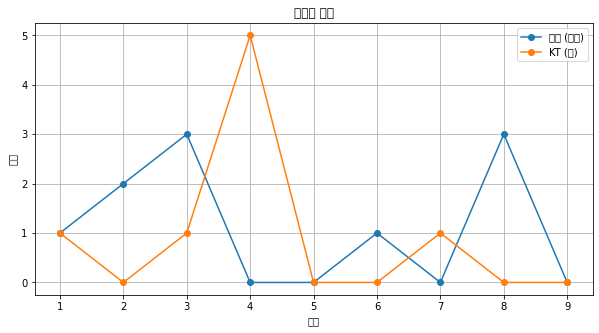

In [93]:
plt.figure(figsize=(10, 5))
plot_inning_scores("ÎëêÏÇ∞ (ÏõêÏ†ï)", result['away_inning_scores'])
plot_inning_scores("KT (Ìôà)", result['home_inning_scores'])
plt.show()

## ÌÉÄÏûêÎ≥Ñ ÌïòÎ£® Í≤∞Í≥ºÎ•º ÎÇòÌÉÄÎÇ¥Îäî Ìï®Ïàò

In [94]:
def print_player_stats(team_name, stats_dict):
    print(f"\nüìä {team_name} ÌÉÄÏûê ÏÑ±Ï†Å")
    print("-" * 30)
    for player, stats in stats_dict.items():
        ab = stats['ÌÉÄÏàò']
        hits = stats['ÏïàÌÉÄ']
        avg = hits / ab if ab > 0 else 0
        print(f"{player}: {ab}ÌÉÄÏàò {hits}ÏïàÌÉÄ ({avg:.3f})")


In [95]:
print_player_stats("ÎëêÏÇ∞", result['away_stats'])
print_player_stats("KT", result['home_stats'])


üìä ÎëêÏÇ∞ ÌÉÄÏûê ÏÑ±Ï†Å
------------------------------
Ï†ïÏàòÎπà: 5ÌÉÄÏàò 2ÏïàÌÉÄ (0.400)
ÍπÄÍ∏∞Ïó∞: 5ÌÉÄÏàò 0ÏïàÌÉÄ (0.000)
ÏºÄÏù¥Î∏å: 5ÌÉÄÏàò 0ÏïàÌÉÄ (0.000)
ÏñëÏùòÏßÄ: 4ÌÉÄÏàò 2ÏïàÌÉÄ (0.500)
ÏñëÏÑùÌôò: 4ÌÉÄÏàò 3ÏïàÌÉÄ (0.750)
ÍπÄÏù∏ÌÉú: 4ÌÉÄÏàò 1ÏïàÌÉÄ (0.250)
ÍπÄÏû¨Ìôò: 4ÌÉÄÏàò 1ÏïàÌÉÄ (0.250)
Ïò§Î™ÖÏßÑ: 4ÌÉÄÏàò 2ÏïàÌÉÄ (0.500)
Î∞ïÏ§ÄÏòÅ: 4ÌÉÄÏàò 1ÏïàÌÉÄ (0.250)

üìä KT ÌÉÄÏûê ÏÑ±Ï†Å
------------------------------
ÏïàÌòÑÎØº: 5ÌÉÄÏàò 2ÏïàÌÉÄ (0.400)
ÍπÄÎØºÌòÅ: 4ÌÉÄÏàò 0ÏïàÌÉÄ (0.000)
Ìô©Ïû¨Í∑†: 4ÌÉÄÏàò 0ÏïàÌÉÄ (0.000)
Í∂åÎèôÏßÑ: 4ÌÉÄÏàò 2ÏïàÌÉÄ (0.500)
Î°úÌïòÏä§: 4ÌÉÄÏàò 0ÏïàÌÉÄ (0.000)
ÌóàÍ≤ΩÎØº: 4ÌÉÄÏàò 1ÏïàÌÉÄ (0.250)
ÍπÄÏÉÅÏàò: 4ÌÉÄÏàò 2ÏïàÌÉÄ (0.500)
Í∞ïÎ∞±Ìò∏: 4ÌÉÄÏàò 1ÏïàÌÉÄ (0.250)
Ïû•ÏÑ±Ïö∞: 4ÌÉÄÏàò 2ÏïàÌÉÄ (0.500)


In [96]:
def simulate_game_monte_carlo(n_simulations, away_lineup, away_probs, home_lineup, home_probs):
    results = []
    for _ in range(n_simulations):
        game_result = simulate_game(away_lineup, away_probs, home_lineup, home_probs)
        results.append(game_result)
    return results

In [97]:
def summarize_results(results):
    away_total = [r['away_total'] for r in results]
    home_total = [r['home_total'] for r in results]
    print(f"ÌèâÍ∑† Ï†êÏàò (AWAY): {sum(away_total)/len(away_total):.2f}")
    print(f"ÌèâÍ∑† Ï†êÏàò (HOME): {sum(home_total)/len(home_total):.2f}")
    print(f"ÏäπÎ•† (AWAY): {sum(1 for i in range(len(results)) if away_total[i] > home_total[i]) / len(results):.2%}")
    print(f"ÏäπÎ•† (HOME): {sum(1 for i in range(len(results)) if home_total[i] > away_total[i]) / len(results):.2%}")

In [98]:
doosan_probs = compute_player_hit_probs(doosan_merged)
kt_probs = compute_player_hit_probs(kt_merged)

In [99]:
monte_results = simulate_game_monte_carlo(
    n_simulations=200,
    away_lineup=doosan_lineup,
    away_probs=doosan_probs,
    home_lineup=kt_lineup,
    home_probs=kt_probs
)

In [100]:
summarize_results(monte_results)

ÌèâÍ∑† Ï†êÏàò (AWAY): 6.25
ÌèâÍ∑† Ï†êÏàò (HOME): 4.14
ÏäπÎ•† (AWAY): 64.50%
ÏäπÎ•† (HOME): 24.00%
